<a href="https://colab.research.google.com/github/tousifo/ml_notebooks/blob/main/Solution_of_capture_the_scene_tousif_bin_parves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Get Video
!wget -P video/ "https://ml-hiring.fringecore.sh/capture_the_scene/video.mp4"

--2025-07-06 14:21:03--  https://ml-hiring.fringecore.sh/capture_the_scene/video.mp4
Resolving ml-hiring.fringecore.sh (ml-hiring.fringecore.sh)... 104.21.75.216, 172.67.182.61, 2606:4700:3031::6815:4bd8, ...
Connecting to ml-hiring.fringecore.sh (ml-hiring.fringecore.sh)|104.21.75.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3700355 (3.5M) [video/mp4]
Saving to: ‘video/video.mp4’

video.mp4           100%[===================>]   3.53M  --.-KB/s    in 0.09s   

2025-07-06 14:21:03 (37.2 MB/s) - ‘video/video.mp4’ saved [3700355/3700355]



# Function to Implement

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def process_video_for_pano(video_path,
                           frame_step: int = 30,
                           out_path: str = '/content/pano.jpg'):

    # ensure output folder exists
    os.makedirs(os.path.dirname(out_path), exist_ok=True)

    # 1. Extract key frames
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise IOError(f"Cannot open video {video_path}")
    frames = []
    idx = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if idx % frame_step == 0:
            frames.append(frame)
        idx += 1
    cap.release()
    print(f"> Extracted {len(frames)} frames for stitching")

    # 2. Stitch into panorama
    stitcher = cv2.Stitcher_create(cv2.Stitcher_PANORAMA)
    status, pano = stitcher.stitch(frames)
    if status != cv2.Stitcher_OK:
        raise RuntimeError(f"Stitching failed (status = {status})")

    # 3. Save result
    cv2.imwrite(out_path, pano)
    print(f"> Panorama saved to {out_path}")

    # 4. Display inline
    pano_rgb = cv2.cvtColor(pano, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(16, 6))
    plt.imshow(pano_rgb)
    plt.axis('off')
    plt.show()

    return out_path

# Eval

> Extracted 9 frames for stitching
> Panorama saved to /content/pano.jpg


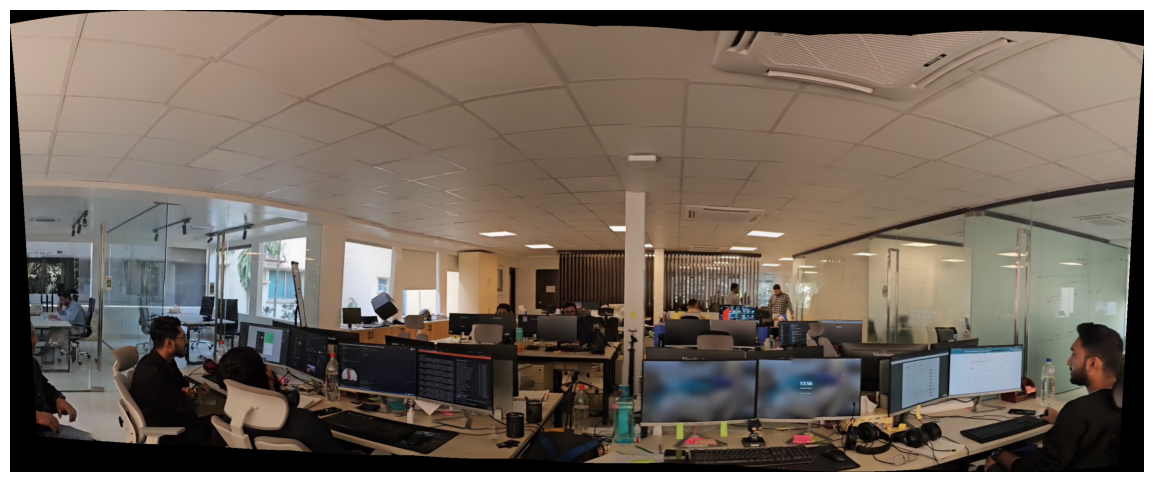

'/content/pano.jpg'

In [3]:
# @title Get Pano

video_file_path = '/content/video/video.mp4'
process_video_for_pano(video_file_path)
